# Statistical Modeling Project

## Introduction

In this project we will take a look at the red wine quality dataset. We will clean and preprocess the data, do exploratory data analysis, statistical inference, and prediction using linear regression with other additional tasks. The dataset is obtained from Kaggle which is a dataset  that is related to red variant of the Portuguese "Vinho Verde" wine.

## Requirements

1. Download the data from Red Wine Quality.
2. Load the data using Pandas.
3. Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
4. Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
5. Apply linear machine learning models to predict the quality column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
6. Apply linear machine learning models to predict the alcohol column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
7. Create a Google Data Studio dashboard with at least three different types of charts.
8. Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
9. Provide suggestions about how your analysis can be improved.

## Imports and Looking at the dataset

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
import warnings

In [81]:
df = pd.read_csv('winequality-red.csv')

In [82]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [84]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [85]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Our dataset look clean 🧼

In [86]:
# supress warnings in the notebook
warnings.filterwarnings('ignore')

## Exploratory Data Analysis(EDA)

### Questions

1. What is the distribution of each feature in the dataset? 
2. What is the ditribution of wine quality among the rest of the features?
3. How is the correlation between different features? 
4. How does the quality of the wine vary with each feature? Are there any notable differences in the distribution of features between wines of different quality levels? Which features have the strongest impact on wine quality? 
5. Can we identify any thresholds or ranges for optimal wine quality? 
6. How does each feature contribute to the overall wine quality? 
7. Are there any interactions or synergistic effects between different features? 

[Google Data Studio Visualization Link](https://lookerstudio.google.com/reporting/d9999b7a-b040-49c3-af56-75918548f51f)

### What is the distribution of each feature in the dataset? 

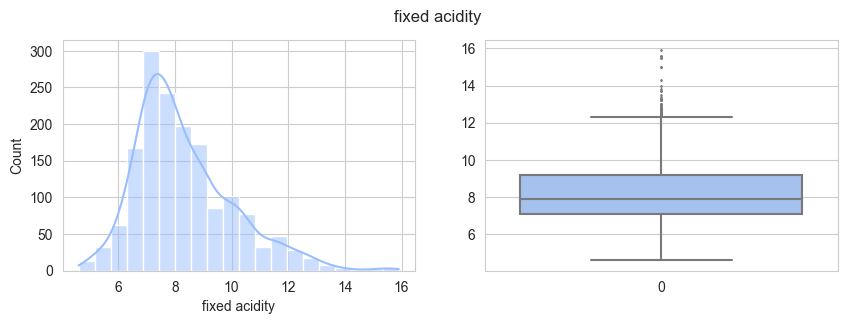

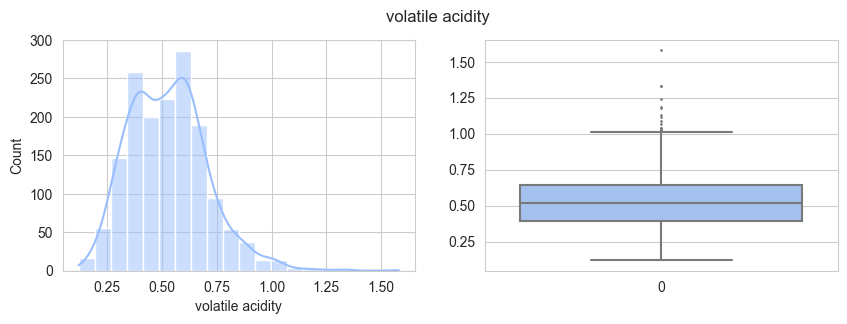

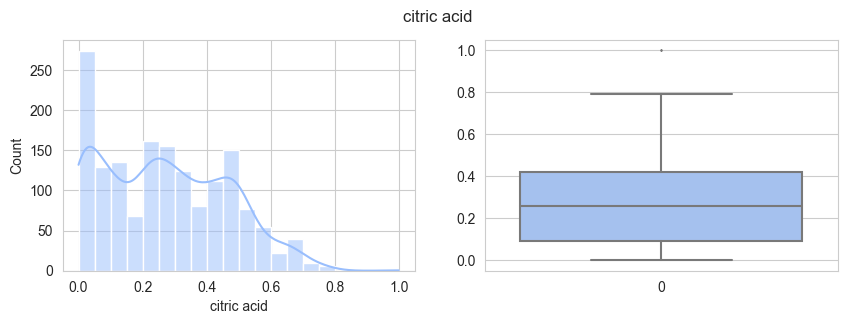

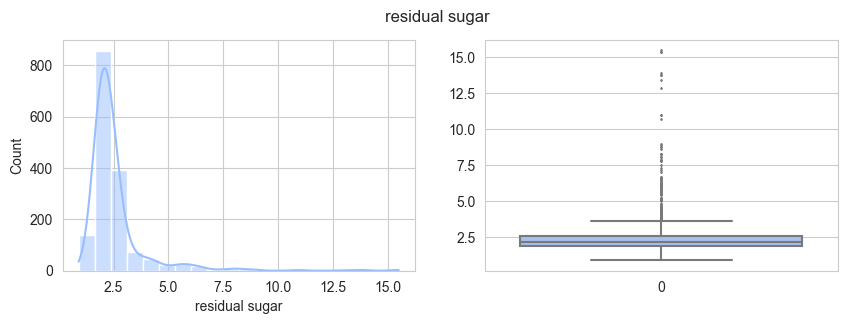

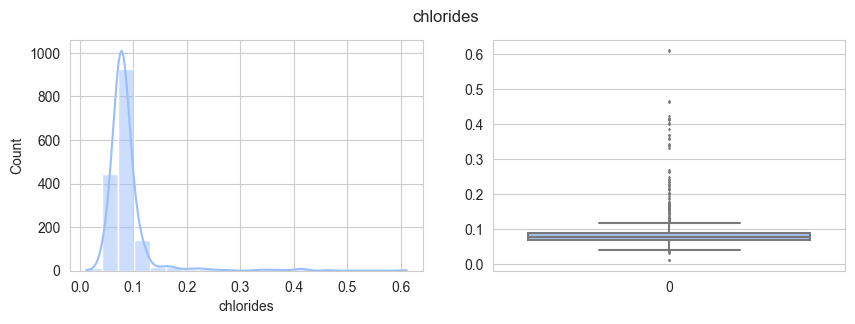

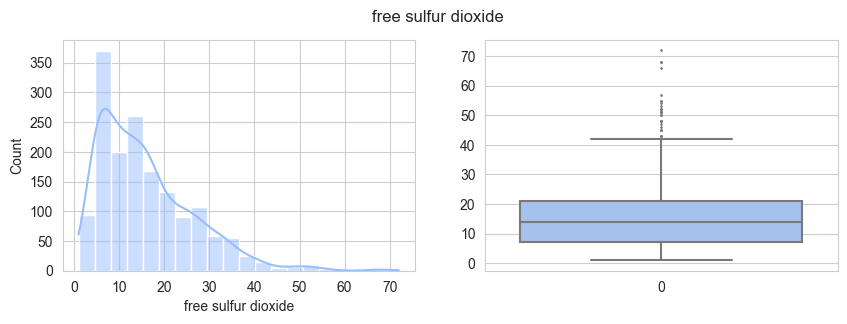

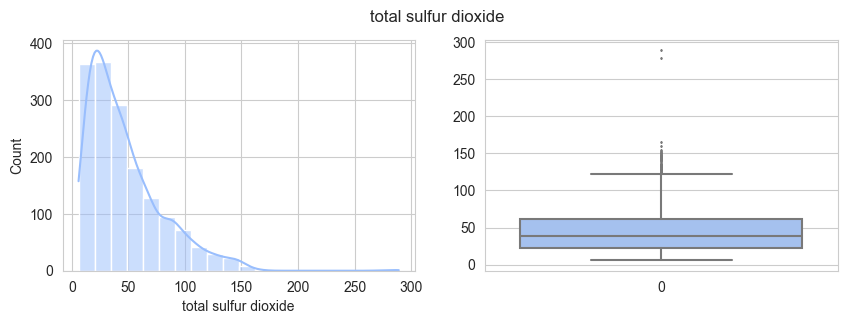

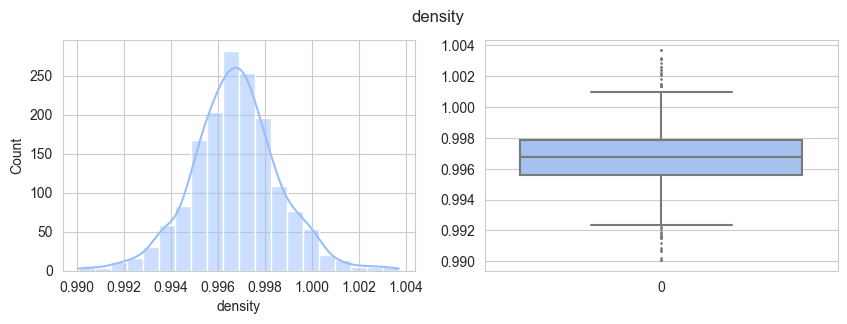

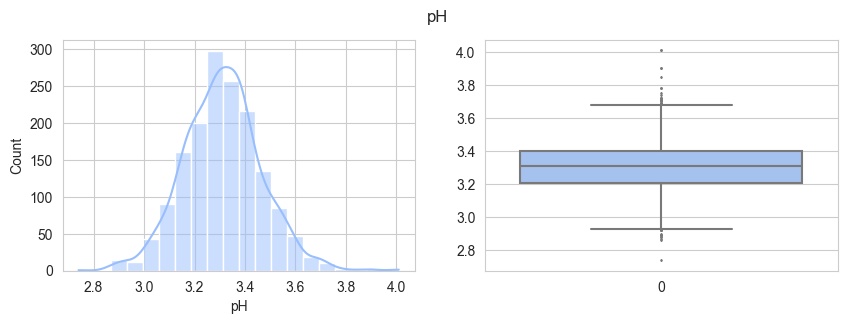

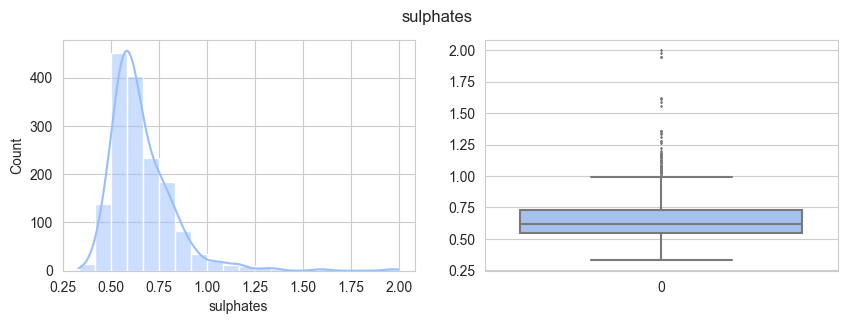

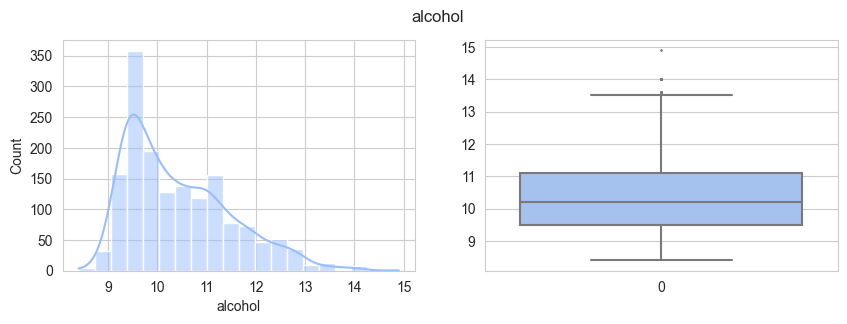

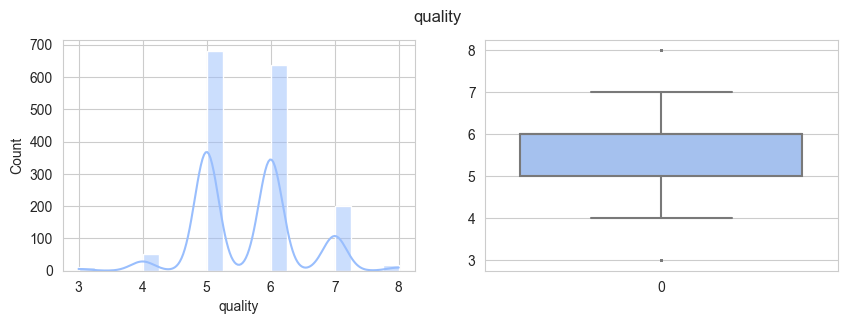

In [87]:
for i in df:
    fig, axs = plt.subplots(1,2,figsize=(10, 3))
    fig.suptitle(i)
    sns.histplot(df[i], bins=20, kde=True, ax=axs[0], color="#99befd")
    sns.boxplot(df[i], ax = axs[1], color='#99befa', fliersize=1)

- The features **density** and **PH** tend to be more normally distributed.
- The features **Residual Sugar**, **Chlorides**, and **Sulphates** have more outliers than the rest, but the ouliers are in a valid range.

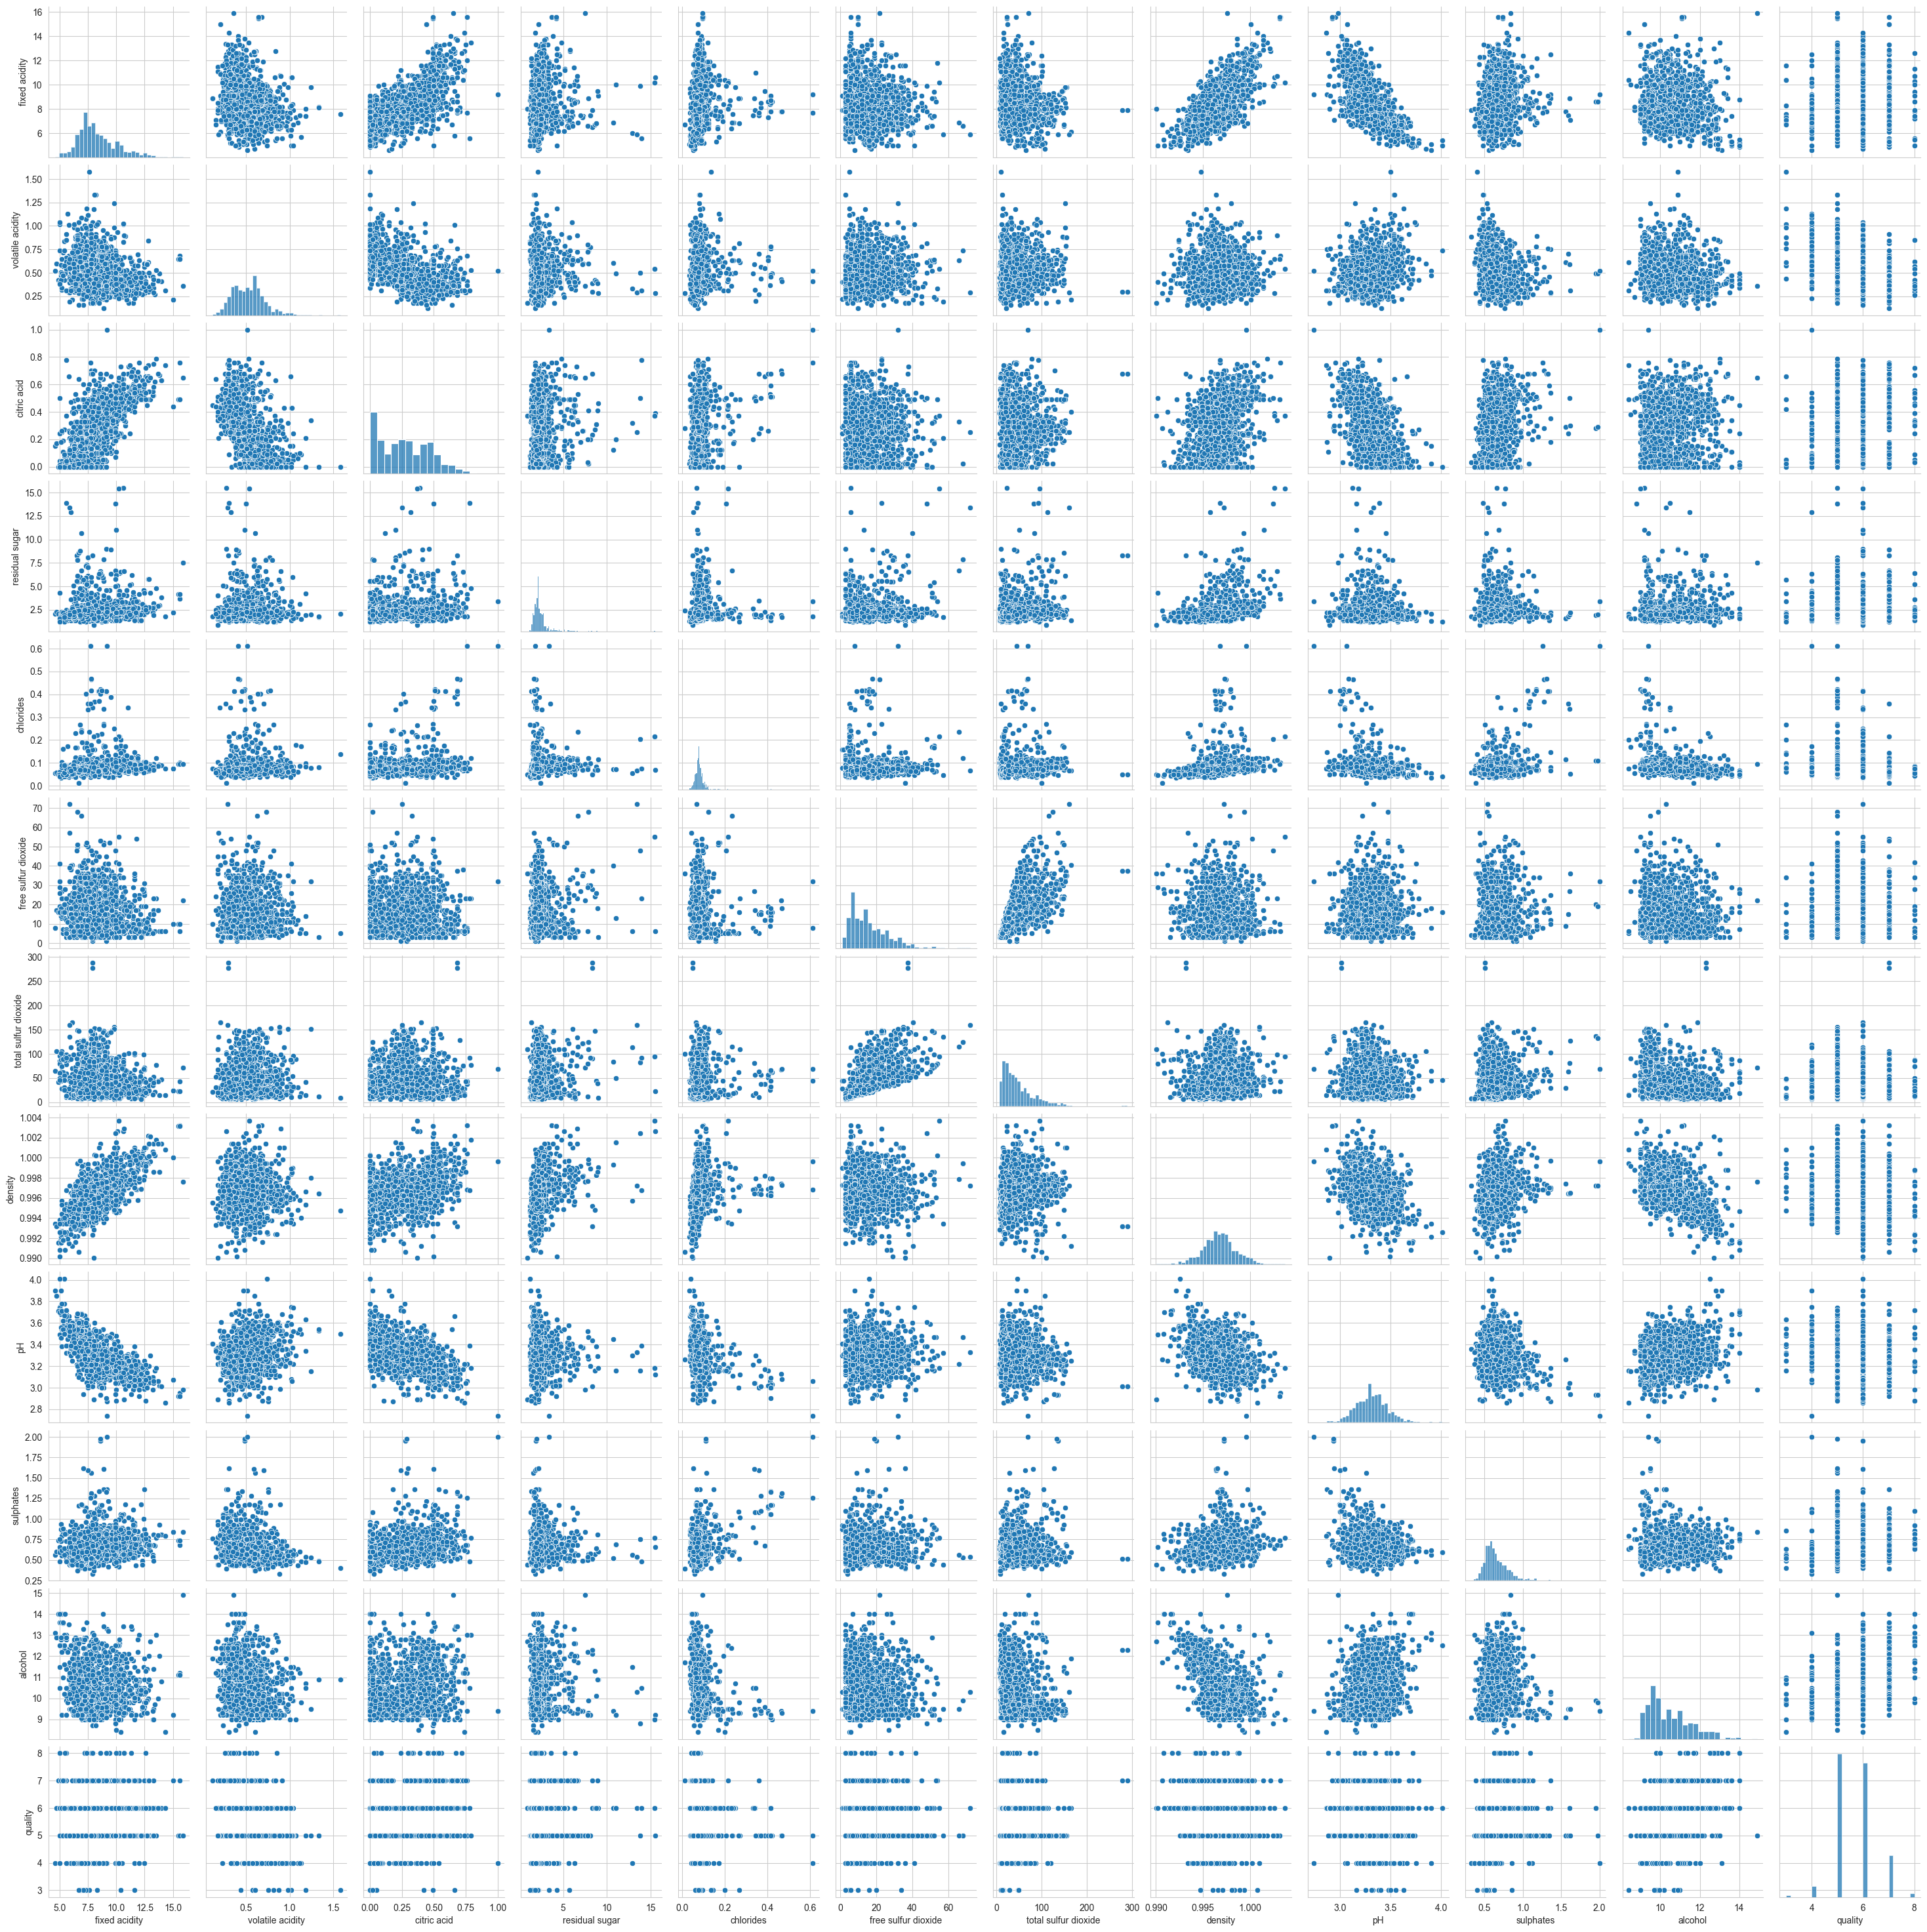

In [88]:
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
sns.pairplot(df)

### What is the ditribution of wine quality among the rest of the features?

- Let's take the cutoff point of **6.5** since most agree on this being the beggining of a good wine quality value.

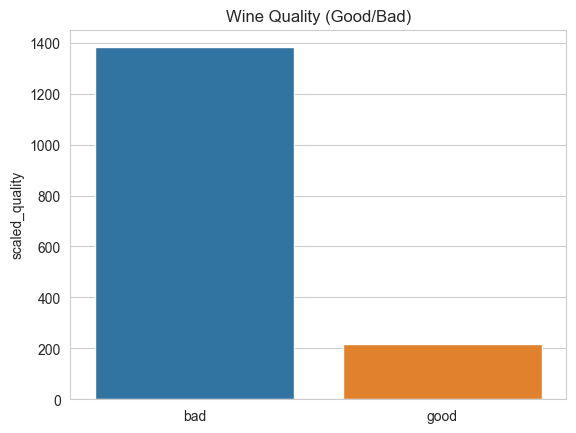

In [89]:
bins = (0, 6.5, 10)
labels = [0,1]
df['scaled_quality'] = pd.cut(x=df['quality'], bins=bins, labels=labels)
df['scaled_quality'].value_counts()
sns.barplot(x=['bad','good'], y=df['scaled_quality'].value_counts()).set_title('Wine Quality (Good/Bad)')
plt.show()

We can see that there are a little amount of wine that are above the value of 6.5 as compared to the ones below it.

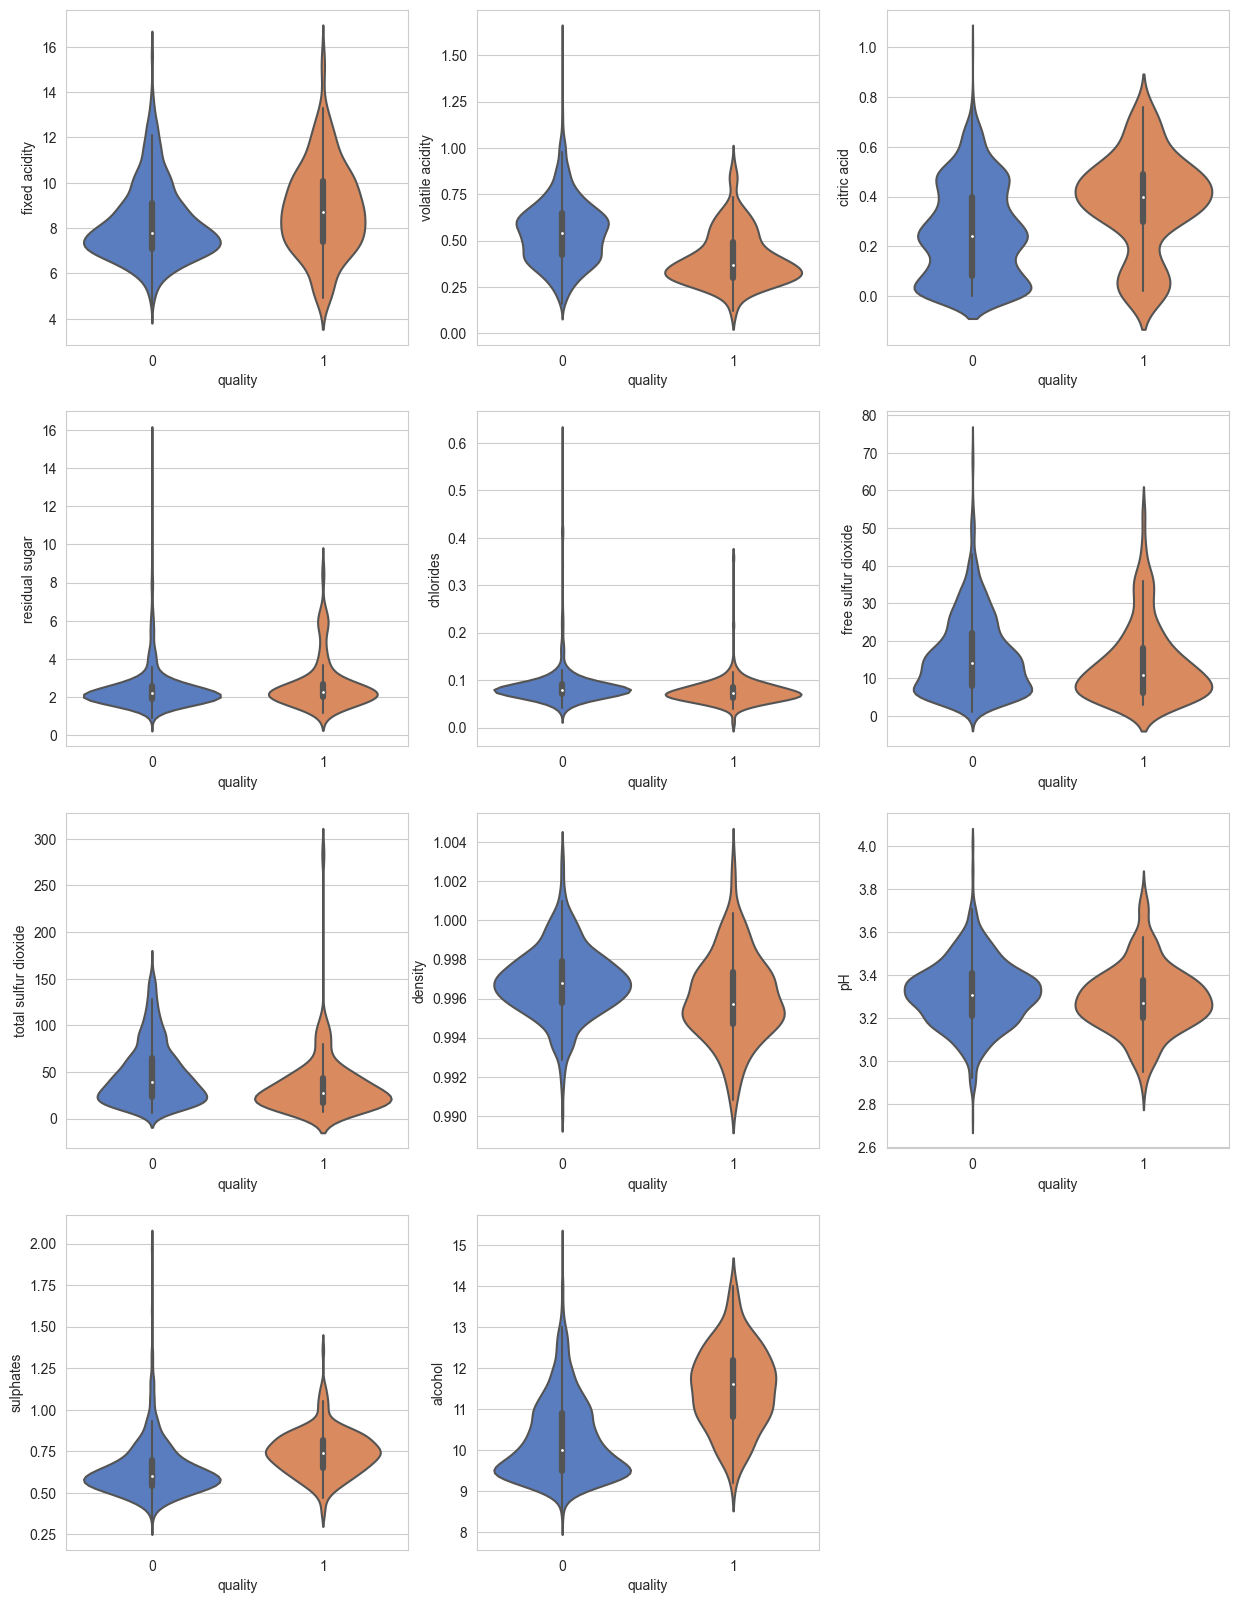

In [90]:
wine_data = df.copy()
wine_data['quality'] = wine_data.quality.apply(lambda x : 1 if x > 6.5 else 0)
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.violinplot(x="quality", y=col, data=wine_data, palette="muted", split=True)
    cnt+=1
plt.show()

We see that both Good and Bad wine are distributed almost equally. Although we see some deviations in the Alcohol vs Quality plot.

### How is the correlation between different features? 

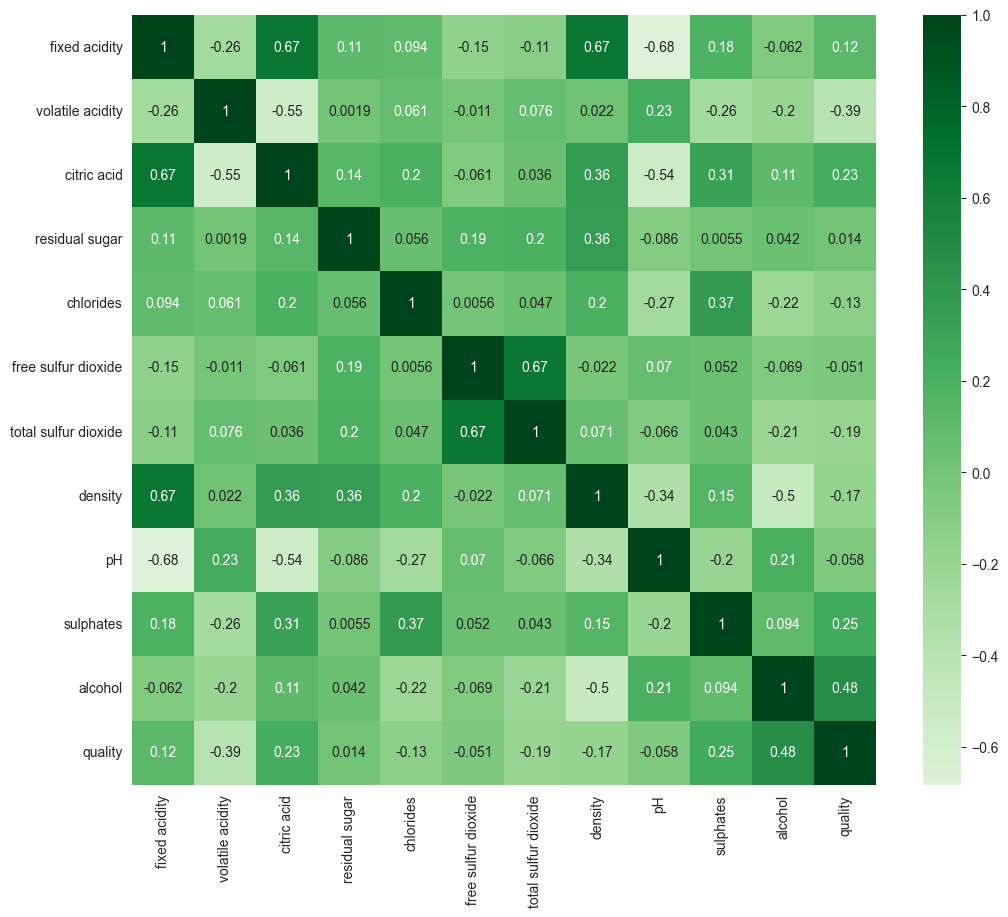

In [91]:
fig = plt.figure(figsize = [12,10])
sns.heatmap(df.corr(), annot = True, cmap = 'Greens', center = 0)
plt.show()

Strongly Positively Coorelated Features:
1. Citric Acid <> Fixed acidity
2. Density <> Fixed Acidity
3. Free Sulfur Dioxide <> Total Sulfur Dioxide

Strongly Negatively Coorelated Features:
1. PH <> Fixed Acidity
2. PH <> Citric Acid
3. Citric Acid <> Volatile Acidity
    - Why? *Explanation: **Citric acid** is a naturally occurring organic acid found in grapes and other fruits. In wine, it contributes to the overall acidity and can enhance the freshness and liveliness of the wine's flavor profile. **Volatile acidity**, on the other hand, refers to the presence of volatile acids such as acetic acid in wine. It is primarily produced by microbial activity during the fermentation process or as a result of oxidation. High levels of volatile acidity can lead to undesirable characteristics in wine, such as a vinegary or sharp aroma and taste*
4. Density <> Alcohol


### How does the quality of the wine vary with each feature?

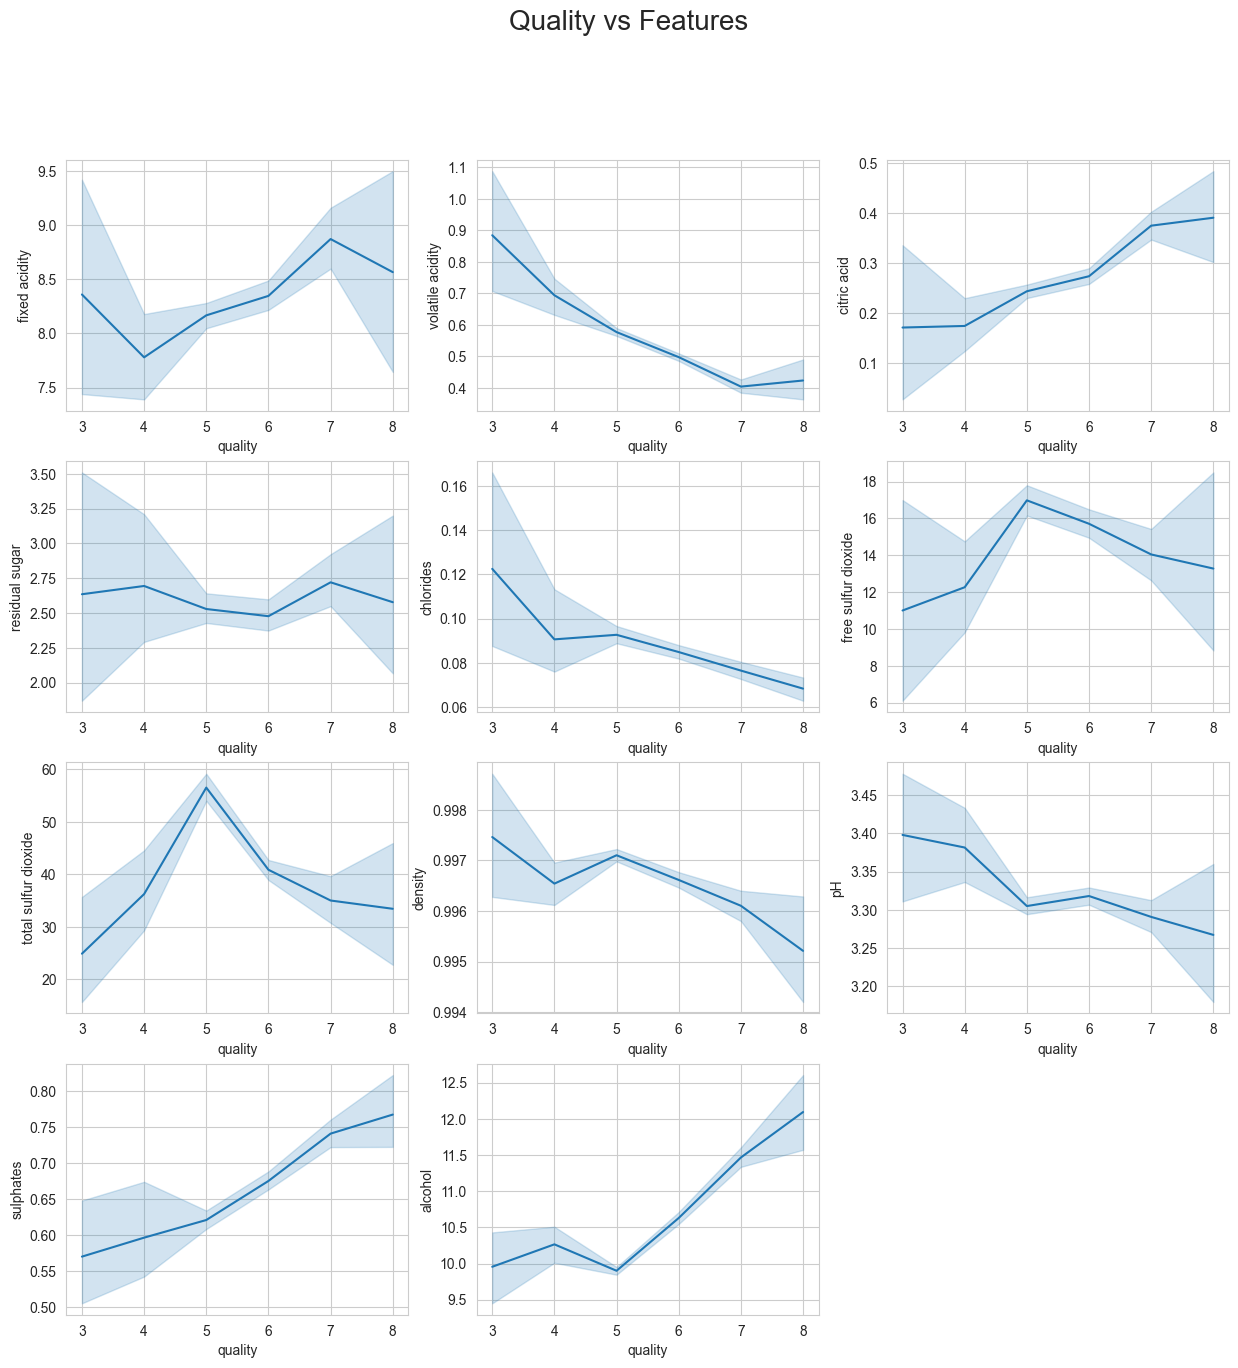

In [92]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = [15,15])
fig.suptitle('Quality vs Features', fontsize=20)
cnt = 1
for col in df:
    plt.subplot(4,3,cnt)
    sns.lineplot(data=df, x="quality", y=col)
    cnt+=1
    if cnt == 12: break
plt.show()  

Positive relationship:
- Fixed acidity *(but not very good when it increases 8.5)*
- Citric Acid
- Sulphates
- Alcohol

Negative relationship:
- Volatile Acidity 
- Chlorides
- Density
- PH

Flucuating
- Free Sulfur Dioxide 
- Total Sulfur Dioxide
*(both of these features tend to increase until wine quality approahes to 5 but show a decrease afterwards which may indicate it has a certain threshold for which we cannot go beyond or it might reduce the quakity of the wine. So that me we need Sulfur Dioxide in a limited amount.)*

Neutral
- Residual Sugar *(as long as it is around the range 2.4 - 2.8)*

In [93]:
df.drop('scaled_quality', axis=1, inplace=True)

### How does each feature contribute to the overall wine quality? 

In [94]:
# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df["quality"]

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the feature coefficients and names
feature_coeffs = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# Sort the coefficients based on their absolute values in descending order
feature_coeffs['Absolute Coefficient'] = abs(feature_coeffs['Coefficient'])
feature_coeffs = feature_coeffs.sort_values('Absolute Coefficient', ascending=False)

# Print the feature coefficients in descending order
print(feature_coeffs)

                 Feature  Coefficient  Absolute Coefficient
7                density   -17.881164             17.881164
4              chlorides    -1.874225              1.874225
1       volatile acidity    -1.083590              1.083590
9              sulphates     0.916334              0.916334
8                     pH    -0.413653              0.413653
10               alcohol     0.276198              0.276198
2            citric acid    -0.182564              0.182564
0          fixed acidity     0.024991              0.024991
3         residual sugar     0.016331              0.016331
5    free sulfur dioxide     0.004361              0.004361
6   total sulfur dioxide    -0.003265              0.003265


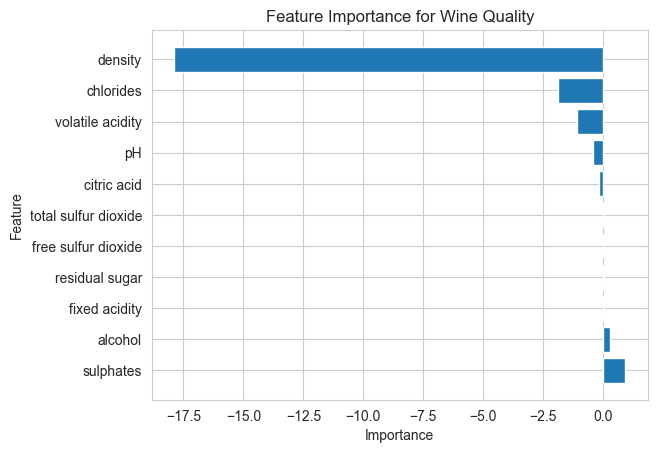

In [95]:
feature_coeffs = feature_coeffs.sort_values('Coefficient', ascending=False)

# Plot the feature importance
plt.barh(feature_coeffs['Feature'], feature_coeffs['Coefficient'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Wine Quality')
plt.show()

### Can we identify any thresholds or ranges for optimal wine quality? 

Descriptive Statistics:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
Low Quality Threshold: 5.0
Medium Quality Threshold: 6.0
High Quality Threshold: 6.0


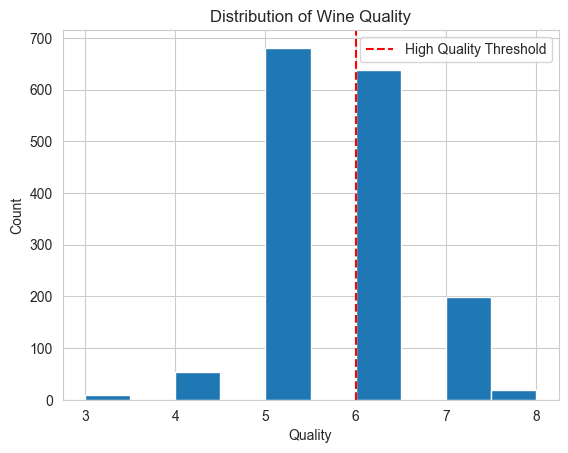

In [96]:
quality = df["quality"]

# Calculate the descriptive statistics of quality
quality_stats = quality.describe()

# Print the descriptive statistics and the number/percentage of wines above the threshold
print("Descriptive Statistics:")
print(quality_stats)

# Calculate the quartiles
q1 = quality.quantile(0.25)
q2 = quality.quantile(0.5)
q3 = quality.quantile(0.75)

# Define the thresholds for different quality ranges
low_quality_threshold = q1
medium_quality_threshold = q2
high_quality_threshold = q3

# Print the thresholds
print("Low Quality Threshold:", low_quality_threshold)
print("Medium Quality Threshold:", medium_quality_threshold)
print("High Quality Threshold:", high_quality_threshold)

# Create a histogram of quality scores
plt.hist(quality, bins=10)
plt.axvline(x=high_quality_threshold, color='red', linestyle='--', label='High Quality Threshold')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.legend()
plt.show()

### Are there any interactions or synergistic effects between different features? 

In [97]:
# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df["quality"]

# Create interaction terms between the features
interaction_terms = sm.add_constant(X)
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        interaction_terms[X.columns[i] + "*" + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

# Fit the linear regression model with interaction terms
model = sm.OLS(y, interaction_terms)
results = model.fit()

# Get the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     17.21
Date:                Mon, 15 May 2023   Prob (F-statistic):          6.08e-140
Time:                        11:55:13   Log-Likelihood:                -1483.1
No. Observations:                1599   AIC:                             3100.
Df Residuals:                    1532   BIC:                             3461.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

The larger coefficients under the "coef" column (both highly negative and positive) indicate a higher impact on the quality of wine.
That means the faetures **Citric Acid**, **Chlorides**, **Density**, and **Sulphates** takes the largest share in affecting wine quality.

## Hypothesis Testing

**Null Hypothesis**: There is no difference in the mean residual sugar content between high-quality (quality score > 6.5) and low-quality (quality score ≤ 6.5) wines.

**Alternative Hypothesis**: There is a significant difference in the mean residual sugar content between high-quality and low-quality wines.

In [98]:
# Split the data into high and low-quality wines
high_quality = df[df["quality"] > 6.5]
low_quality = df[df["quality"] <= 6.5]

alpha = 0.05

# Perform the t-test for the mean residual sugar content
t_stat, p_val = stats.ttest_ind(high_quality["residual sugar"], low_quality["residual sugar"])

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_val)

# Check if the p-value is less than the alpha level
if p_val < alpha:
    print("We reject the null hypothesis." + '\n')
else:
    print("We fail to reject the null hypothesis." + '\n')


# perform the z-test for the mean residual sugar content
z_stat, p_val = sm.stats.ztest(high_quality["residual sugar"], low_quality["residual sugar"])

# print the z-statistic and p-value
print("z-statistic:", z_stat)
print("p-value:", p_val)

# check if the p-value is less than the alpha level
if p_val < alpha:
    print("We reject the null hypothesis." + '\n')
else:
    print("We fail to reject the null hypothesis." + '\n')

# set the confidence interval
conf = 0.95

# calculate the mean and standard deviation of residual sugar content
mean = df["residual sugar"].mean()
std = df["residual sugar"].std()

# calculate the margin of error
margin_of_error = stats.norm.ppf((1 + conf) / 2, loc=mean, scale=std) - mean

# calculate the confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# print the confidence interval
print("Confidence Interval:", confidence_interval)

t-statistic: 1.9115483882007416
p-value: 0.056112960300893584
We fail to reject the null hypothesis.

z-statistic: 1.9115483882007416
p-value: 0.05593414467749971
We fail to reject the null hypothesis.

Confidence Interval: (-0.22460271398706588, 5.302213720866366)


**Confidence interval calculation description**: We calculate the margin of error using the inverse cumulative distribution function (ppf) of a standard normal distribution. The `(1 + conf) / 2` calculates the critical value based on the desired confidence level (conf). `loc=mean` and `scale=std` specify the mean and standard deviation of the distribution. The result is subtracted by the mean to obtain the margin of error.
confidence_interval = `(mean - margin_of_error, mean + margin_of_error)`.

*This means there is no difference in the mean residual sugar content between high-quality (quality score > 6.5) and low-quality (quality score ≤ 6.5) wines.*

**Null Hypothesis**: The alcohol content has no effect on the perceived quality of the wine.

**Alternative Hypothesis**: The alcohol content significantly affects the perceived quality of the wine.

In [99]:
# split the data into high and low-quality wines
high_quality = df[df["quality"] > 6.5]
low_quality = df[df["quality"] <= 6.5]

# perform the t-test for the mean alcohol content
t_stat, p_val = stats.ttest_ind(high_quality["alcohol"], low_quality["alcohol"])

# print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_val)

# check if the p-value is less than the alpha level
if p_val < alpha:
    print("We reject the null hypothesis." + '\n')
else:
    print("We fail to reject the null hypothesis." + '\n')

# perform the z-test for the mean alcohol content
z_stat, p_val = sm.stats.ztest(high_quality["alcohol"], low_quality["alcohol"])

# print the z-statistic and p-value
print("z-statistic:", z_stat)
print("p-value:", p_val)

# check if the p-value is less than the alpha level
if p_val < alpha:
    print("We reject the null hypothesis." + '\n')
else:
    print("We fail to reject the null hypothesis." + '\n')

# set the confidence interval
conf = 0.95

# calculate the mean and standard deviation of alcohol content
mean = df["alcohol"].mean()
std = df["alcohol"].std()

# calculate the margin of error
margin_of_error = stats.norm.ppf((1 + conf) / 2, loc=mean, scale=std) - mean

# calculate the confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# print the confidence interval
print("Confidence Interval:", confidence_interval)

t-statistic: 17.822763607394528
p-value: 6.016774226316707e-65
We reject the null hypothesis.

z-statistic: 17.822763607394528
p-value: 4.705343335532456e-71
We reject the null hypothesis.

Confidence Interval: (8.33431303453375, 12.511653194359308)


*Here we see that the alcohol content significantly affects the perceived quality of the wine.*

**Null Hypothesis**: The density of the wine is not related to its quality.

**Alternative Hypothesis**: The density of the wine is significantly related to its quality.

In [100]:
# split the data into high and low-quality wines
high_quality = df[df["quality"] > 6.5]
low_quality = df[df["quality"] <= 6.5]

# perform the t-test for the mean density
t_stat, p_val = stats.ttest_ind(high_quality["density"], low_quality["density"])

# print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_val)

# check if the p-value is less than the alpha level
if p_val < alpha:
    print("We reject the null hypothesis." + '\n')
else:
    print("We fail to reject the null hypothesis." + '\n')

# perform the z-test for the mean density
z_stat, p_val = sm.stats.ztest(high_quality["density"], low_quality["density"])

# print the z-statistic and p-value
print("z-statistic:", z_stat)
print("p-value:", p_val)

# check if the p-value is less than the alpha level
if p_val < alpha:
    print("We reject the null hypothesis." + '\n')
else:
    print("We fail to reject the null hypothesis." + '\n')

# set the confidence interval
conf = 0.95

# calculate the mean and standard deviation of density
mean = df["density"].mean()
std = df["density"].std()

# calculate the margin of error
margin_of_error = stats.norm.ppf((1 + conf) / 2, loc=mean, scale=std) - mean

# calculate the confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# print the confidence interval
print("Confidence Interval:", confidence_interval)

t-statistic: -6.0819787098248055
p-value: 1.4825542088477092e-09
We reject the null hypothesis.

z-statistic: -6.0819787098248055
p-value: 1.1870833428472622e-09
We reject the null hypothesis.

Confidence Interval: (0.9930475725981531, 1.000445785750815)


*Density of the wine is significantly related to its quality.*

**Null Hypothesis**: The citric acid feature of the wine is not correlated with the volatile acidity of the wine.

**Alternative Hypothesis**: The citric acid feature of the wine is correlated with the volatile acidity of the wine.

In [101]:
# perform the pearson correlation test
corr, p_val = stats.pearsonr(df["citric acid"], df["volatile acidity"])

# print the correlation coefficient and p-value
print("Correlation Coefficient:", corr)
print("p-value:", p_val)

# check if the p-value is less than the alpha level
if p_val < alpha:
    print("We reject the null hypothesis." + '\n')
else:
    print("We fail to reject the null hypothesis." + '\n')

# perform the spearman correlation test
corr, p_val = stats.spearmanr(df["citric acid"], df["volatile acidity"])

# print the correlation coefficient and p-value
print("Correlation Coefficient:", corr)
print("p-value:", p_val)

# check if the p-value is less than the alpha level
if p_val < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

Correlation Coefficient: -0.5524956845595799
p-value: 1.8056634143424328e-128
We reject the null hypothesis.

Correlation Coefficient: -0.6102594672899105
p-value: 9.013427029685932e-164
We reject the null hypothesis.


*This means the citric acid feature of the wine is correlated with the volatile acidity of the wine.*

**Null Hypothesis**: The mean fixed acidity is the same for wines of different quality levels.

**Alternative Hypothesis**: The mean fixed acidity differs significantly for wines of different quality levels.

In [102]:
# perform the chi-square test
chi2, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(df["quality"], df["fixed acidity"]))
print("Chi-Square Statistic:", chi2)
print("p-value:", p_val)

# check if the p-value is less than the alpha level
if p_val < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
                                        

Chi-Square Statistic: 736.0798648275643
p-value: 1.4159021578050688e-13
We reject the null hypothesis.


*The mean fixed acidity differs significantly for wines of different quality levels.*

## Linear Regression

Predicting the **quality** column using the other 11 features.

In [103]:
# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform feature selection using F-test (univariate feature selection)
f_values, p_values = f_regression(X_train_scaled, y_train)

# Select the features and fit the linear regression model
selected_features = X_train.columns[p_values < 0.05]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Evaluate the model using R-squared
r_squared = model.score(X_test_selected, y_test)
print("R-squared:", r_squared)

# Calculate and display the mean squared error
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.34048437026626077
Mean Squared Error: 0.36308782838124565
Root Mean Squared Error: 0.6025676960983269


- The R-Squared value indicates our model doesn't do well in terms of fitting the observed data points.
- The MSE and RMSE indicate our model performs well since both values are closer to 0.

Using both the **Akaike Information Criterion (AIC)** and **Bayesian Information Criterion (BIC)** to assess the quality and complexity of the model.

In [104]:
# Perform model selection using AIC and BIC
X_train_selected = sm.add_constant(X_train_selected)
model_sm = sm.OLS(y_train, X_train_selected)
results = model_sm.fit()

aic = results.aic
bic = results.bic
print("AIC:", aic)
print("BIC:", bic)

AIC: 2577.007663466231
BIC: 2633.699835283598


Both the AIC and BIC have higher values which indicates the quality of the model is somewhat lower and that our model is complex.

Using Variance Inflation Factor(VIF) for multicoolinearity checking.

In [105]:
# Assess multicollinearity using Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["Features"] = X_train_selected.columns
vif["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
print("VIF:")
print(vif)

VIF:
                Features           VIF
0                  const  1.094883e+06
1          fixed acidity  6.300533e+00
2       volatile acidity  1.907919e+00
3            citric acid  3.333282e+00
4              chlorides  1.435263e+00
5    free sulfur dioxide  1.973337e+00
6   total sulfur dioxide  2.249662e+00
7                density  4.167632e+00
8                     pH  2.908282e+00
9              sulphates  1.335947e+00
10               alcohol  2.317483e+00


Multicollinearity isn't noticed! 

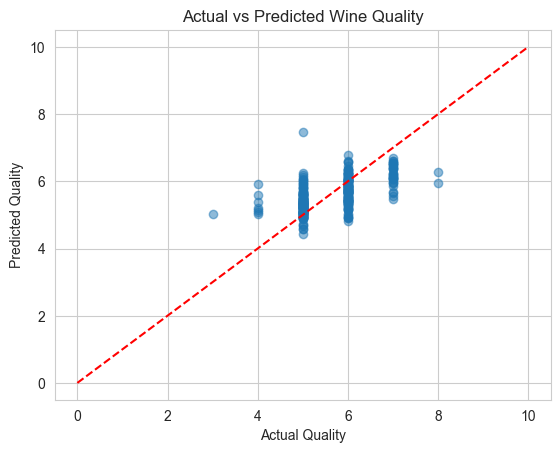

In [106]:
# Plot predicted quality vs actual quality
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 10], [0, 10], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.show()

Predicting the **alcohol** column using the other 11 features.

In [107]:
# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df["alcohol"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform feature selection using F-test
f_values, p_values = f_regression(X_train_scaled, y_train)

# Select the features and fit the linear regression model
selected_features = X_train.columns[p_values < 0.05]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Evaluate the model using R-squared
r_squared = model.score(X_test_selected, y_test)
print("R-squared:", r_squared)

# Calculate and display the mean squared error
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R-squared: 1.0
Mean Squared Error: 1.0424205216816755e-27
Root Mean Squared Error: 3.228653777786766e-14


- The R-Squared value indicates our model does well in terms of fitting the observed data points.
- The MSE and RMSE indicate our model performs somewhat well since both values are very small.

In [108]:
# Perform model selection using AIC and BIC
X_train_selected = sm.add_constant(X_train_selected)
model_sm = sm.OLS(y_train, X_train_selected)
results = model_sm.fit()
aic = results.aic
bic = results.bic
print("AIC:", aic)
print("BIC:", bic)

AIC: -77551.89757370594
BIC: -77500.35923569015


Both the AIC and BIC have smaller values which indicates the quality of the model is higher and that our model is not too complex.

In [109]:
# Assess multicollinearity using Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["Features"] = X_train_selected.columns
vif["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
print("VIF:")
print(vif)

VIF:
               Features            VIF
0                 const  543367.374124
1      volatile acidity       1.775522
2           citric acid       2.683630
3             chlorides       1.400249
4   free sulfur dioxide       1.975745
5  total sulfur dioxide       2.095989
6               density       1.876027
7                    pH       1.598639
8             sulphates       1.379609
9               alcohol       1.849022


Multicollinearity isn't noticed! 

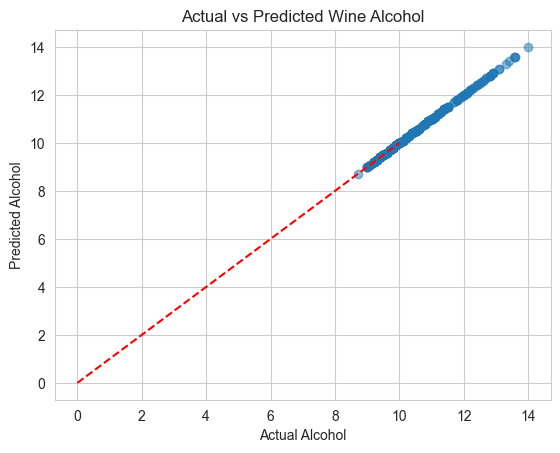

In [110]:
# Plot predicted quality vs actual quality
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 10], [0, 10], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Actual vs Predicted Wine Alcohol')
plt.show()

## Additionals

In [111]:
# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# check the precision, recall, and f1-score
print(classification_report(y_test, y_pred))

Accuracy: 0.53125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.07      0.12        14
           5       0.64      0.68      0.66       145
           6       0.43      0.49      0.46       112
           7       0.46      0.40      0.43        40
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.31      0.27      0.28       320
weighted avg       0.51      0.53      0.52       320



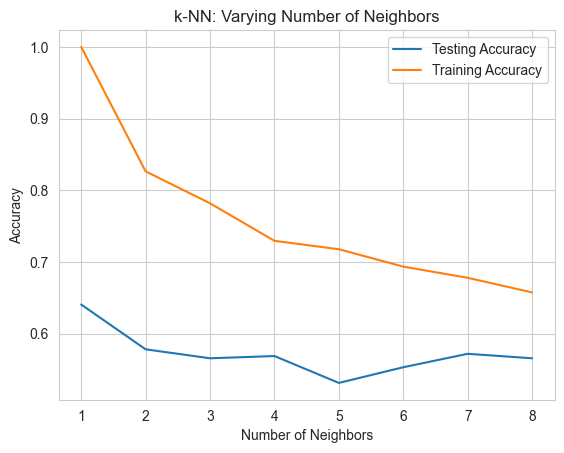

In [112]:
# Plot the neihbors using the elbow method
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    train_accuracy[i] = model.score(X_train_scaled, y_train)
    test_accuracy[i] = model.score(X_test_scaled, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [113]:
# do a logistic regression model and plot the results in a sigmoid curve
# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# check the precision, recall, and f1-score
print(classification_report(y_test, y_pred))

Accuracy: 0.625
              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.50      0.17      0.25         6
           5       0.70      0.76      0.73       140
           6       0.55      0.60      0.57       126
           7       0.59      0.38      0.46        45
           8       0.00      0.00      0.00         1

    accuracy                           0.62       320
   macro avg       0.56      0.40      0.45       320
weighted avg       0.62      0.62      0.62       320



## Findings

1. The features **density** and **PH** tend to be more normally distributed.
2. We can see that there are a little amount of wine that are above the value of 6.5 as compared to the ones below it in the dataset, but the dataset looks evenly ditributed in terms of good and bad wines distribution.
3. We had **Citric Acid <> Fixed acidity**, **Density <> Fixed Acidity**, and **Free Sulfur Dioxide <> Total Sulfur Dioxide** as strongly coorelated features. **PH <> Fixed Acidity**, **PH <> Citric Acid**, **Citric Acid <> Volatile Acidity**, and **Density <> Alcohol** as Strongly Negatively Coorelated Features.
4. We have noticed a positive relationship between quality and the features: **Fixed acidity**, **Citric Acid**, **Sulphates**, and **Alcohol**. A negative relationship between **Volatile Acidity**, **Chlorides**, **Density**, and **PH**, and a Neutral relationship with **Residual Sugar**
5. **Density**, **Chlorides**, and **Volatile Acidity** affect the quality of wine more significantly than others.
6. We have found a threshold of 6 for a wine to be said good.
7. There is no difference in the mean residual sugar content between high-quality (quality score > 6.5) and low-quality (quality score ≤ 6.5) wines.
8. Alcohol content significantly affects the perceived quality of the wine.
9. Density of the wine is significantly related to its quality.
10. Citric acid feature of the wine is correlated with the volatile acidity of the wine. But negatively.
11. The mean fixed acidity differs significantly for wines of different quality levels.

## Recommendation and Conclusion

It would have been good if the dataset contained there data about grape types, wine brand, wine selling price, etc. For more comparison points. But other than that the dataset was clean and balanced. The notebook aims to analyze a dataset related to the red variant of Portuguese "Vinho Verde" wine. The dataset includes 11 features (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol) and the output variable of wine quality. The notebook begins with exploratory data analysis, including descriptive statistics, visualizations, and distribution analysis. It then proceeds to apply linear machine learning models to predict the wine quality using the other features. Model selection is performed, considering statistical significance, R-squared, and information criteria. The notebook further explores feature importance, potential thresholds for optimal wine quality, and examines the contributions of each feature using regression analysis. Additionally, it investigates potential interactions or synergistic effects between different features. Overall, the notebook provides a comprehensive analysis of the dataset to understand the factors influencing wine quality and identify meaningful insights for wine production and quality optimization.